In [1]:
!pip install scikit_posthocs
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 364.4/364.4 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.5/233.5 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.9/78.9 kB 5.9 MB/s eta 0:00:00


In [2]:
from google.colab import files
import pandas as pd

# Prompt to upload the file
uploaded = files.upload()



Saving TRAIN.csv to TRAIN.csv


In [3]:

df = pd.read_csv('TRAIN.csv')

# Display the first few rows
df.head()


,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [4]:
df['Date']=pd.to_datetime(df['Date'])
df_encoded = pd.get_dummies(df, columns=['Store_Type','Location_Type','Region_Code'], drop_first=True)
df_encoded['Discount'] = df_encoded['Discount'].map({'Yes':1,'No':0})
df_encoded = df_encoded.drop(columns=['ID','Store_id'])  # Replace 'ID' with the actual column name
# Example for extracting date-related features
df_encoded['Year'] = df_encoded['Date'].dt.year
df_encoded['Month'] = df_encoded['Date'].dt.month
df_encoded['Day_of_Week'] = df_encoded['Date'].dt.weekday
df_encoded['Days_Since_Start'] = (df_encoded['Date'] - df_encoded['Date'].min()).dt.days

# Drop the original Date column
df_encoded = df_encoded.drop(columns=['Date'])
df_encoded.head()

,Holiday,Discount,#Order,Sales,Store_Type_S2,Store_Type_S3,Store_Type_S4,Location_Type_L2,Location_Type_L3,Location_Type_L4,Location_Type_L5,Region_Code_R2,Region_Code_R3,Region_Code_R4,Year,Month,Day_of_Week,Days_Since_Start
0,1,1,9,7011.84,False,False,False,False,True,False,False,False,False,False,2018,1,0,0
1,1,1,60,51789.12,False,False,True,True,False,False,False,False,False,False,2018,1,0,0
2,1,1,42,36868.20,False,True,False,True,False,False,False,False,False,False,2018,1,0,0
3,1,1,23,19715.16,True,False,False,False,True,False,False,False,False,False,2018,1,0,0
4,1,1,62,45614.52,True,False,False,False,True,False,False,False,False,True,2018,1,0,0


In [5]:
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,#Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   ID             188340 non-null  object        
 1   Store_id       188340 non-null  int64         
 2   Store_Type     188340 non-null  object        
 3   Location_Type  188340 non-null  object        
 4   Region_Code    188340 non-null  object        
 5   Date           188340 non-null  datetime64[ns]
 6   Holiday        188340 non-null  int64         
 7   Discount       188340 non-null  object        
 8   #Order         188340 non-null  int64         
 9   Sales          188340 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(5)
memory usage: 14.4+ MB


In [7]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Holiday           188340 non-null  int64  
 1   Discount          188340 non-null  int64  
 2   #Order            188340 non-null  int64  
 3   Sales             188340 non-null  float64
 4   Store_Type_S2     188340 non-null  bool   
 5   Store_Type_S3     188340 non-null  bool   
 6   Store_Type_S4     188340 non-null  bool   
 7   Location_Type_L2  188340 non-null  bool   
 8   Location_Type_L3  188340 non-null  bool   
 9   Location_Type_L4  188340 non-null  bool   
 10  Location_Type_L5  188340 non-null  bool   
 11  Region_Code_R2    188340 non-null  bool   
 12  Region_Code_R3    188340 non-null  bool   
 13  Region_Code_R4    188340 non-null  bool   
 14  Year              188340 non-null  int32  
 15  Month             188340 non-null  int32  
 16  Day_of_Week       18

##Store type Vs Sales

In [8]:
from sklearn.linear_model import LinearRegression
import pandas as pd


X = df_encoded[['Store_Type_S2', 'Store_Type_S3', 'Store_Type_S4']]# Independent variable
y = df['Sales']  # Dependent variable

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for Store_type
s1,s2,s3=model.coef_
print(f"Coefficient for Store_type: {s1,s2,s3}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")


Coefficient for Store_type: (-10145.683472943985, 9386.55651407853, 22269.17423116279)
R^2 score: 0.35876215622716345


**Insights:**
**Store Type Impacts Sales:**
Store types have a meaningful impact on sales, with S4 having the highest positive impact and S2 showing a negative impact compared to the base type S1.

**Model Fit:**
The R2  value indicates that the model partially captures the relationship between Store_Type and Sales, but it’s not very strong.

**Limitations:**
High variability in sales not explained by store type suggests a need for additional data or features to improve predictions.

In [9]:
# Get the intercept (β0)
print(f"Intercept (β0): {model.intercept_}")


Intercept (β0): 37676.51169449703


<ipython-input-10-0fd6b0ab78ff>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Store_Type', y='Sales', data=df, palette='viridis')


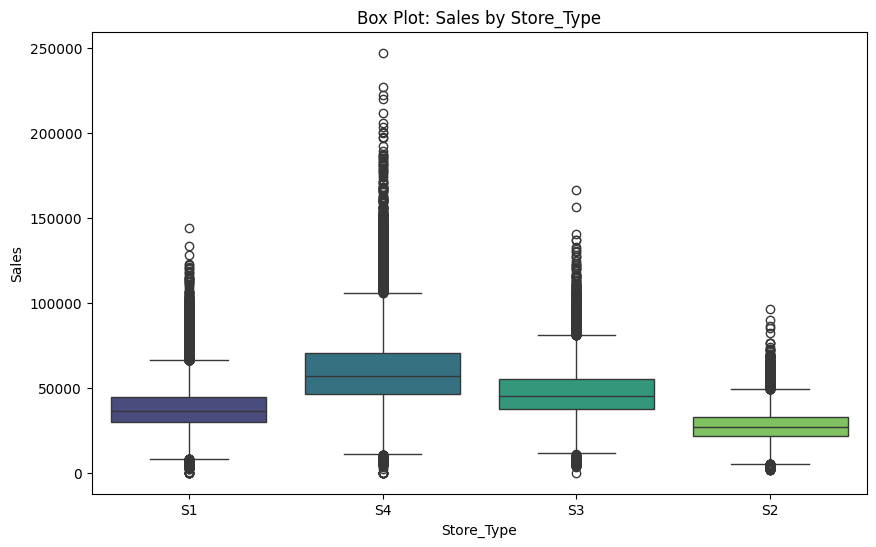

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Store_Type', y='Sales', data=df, palette='viridis')
plt.title('Box Plot: Sales by Store_Type')
plt.xlabel('Store_Type')
plt.ylabel('Sales')
plt.show()


In [11]:
S1_Storetype=df[df['Store_Type']=='S1']['Sales']
S2_Storetype=df[df['Store_Type']=='S2']['Sales']
S3_Storetype=df[df['Store_Type']=='S3']['Sales']
S4_Storetype=df[df['Store_Type']=='S4']['Sales']

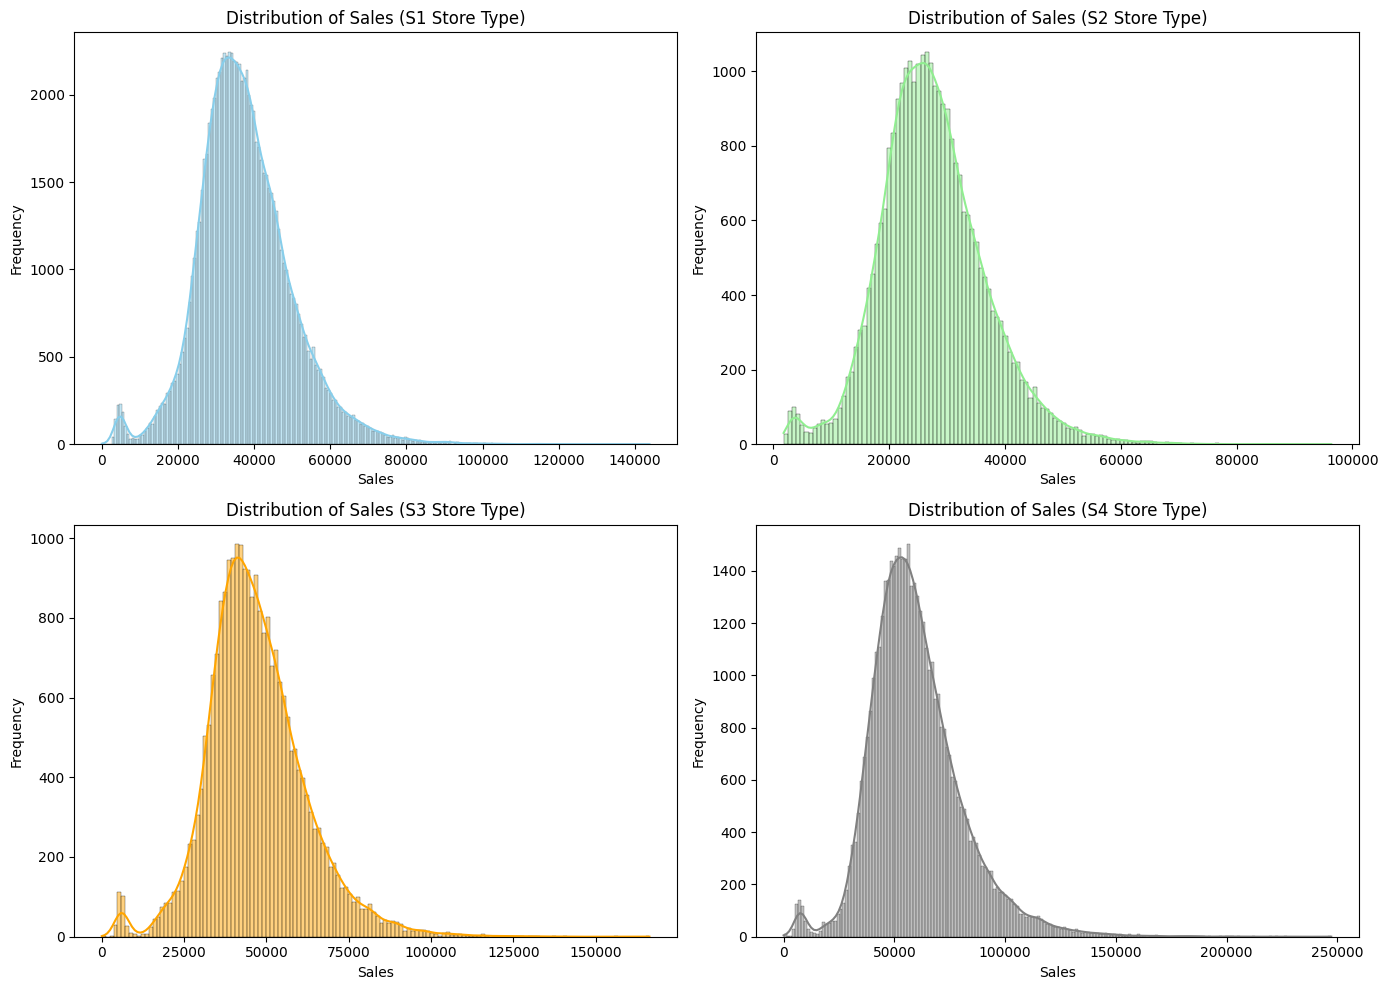

In [12]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram for Sales with S1 Store Type
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
sns.histplot(S1_Storetype, kde=True, color='skyblue')
plt.title('Distribution of Sales (S1 Store Type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with S2 Store Type
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
sns.histplot(S2_Storetype, kde=True, color='lightgreen')
plt.title('Distribution of Sales (S2 Store Type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with S3 Store Type
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
sns.histplot(S3_Storetype, kde=True, color='orange')
plt.title('Distribution of Sales (S3 Store Type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with S4 Store Type
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
sns.histplot(S4_Storetype, kde=True, color='grey')
plt.title('Distribution of Sales (S4 Store Type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout to fit all plots nicely
plt.tight_layout()
plt.show()


In [13]:
 #Normality check for large dataset-Jarque-Bera Test or Anderson-Darling Test
from scipy.stats import jarque_bera, anderson
sales_data=[S1_Storetype,S2_Storetype,S3_Storetype,S4_Storetype]
for sd in sales_data:
        jb_stat, jb_p_value = jarque_bera(sd)
        #print(f"Category: {sd}")
        print(f"Jarque-Bera Test: Statistic={jb_stat}, p-value={jb_p_value}")
        ad_result = anderson(sd)
        print(f"Anderson-Darling Test: Statistic={ad_result.statistic}, Significance={ad_result.significance_level}")


Jarque-Bera Test: Statistic=22811.726347477615, p-value=0.0
Anderson-Darling Test: Statistic=543.3329735718726, Significance=[15.  10.   5.   2.5  1. ]
Jarque-Bera Test: Statistic=4037.216489762338, p-value=0.0
Anderson-Darling Test: Statistic=120.34809684736683, Significance=[15.  10.   5.   2.5  1. ]
Jarque-Bera Test: Statistic=6618.3105194079535, p-value=0.0
Anderson-Darling Test: Statistic=173.32971998776338, Significance=[15.  10.   5.   2.5  1. ]
Jarque-Bera Test: Statistic=25216.773093921223, p-value=0.0
Anderson-Darling Test: Statistic=502.03456372728397, Significance=[15.  10.   5.   2.5  1. ]


H0(Null Hypothesis): Data is normally distributed
Ha(Alternative Hypothesis): Data is not normally distributed

Interpreting the Output:
1. Jarque-Bera Test
In all cases, the p-value is 0.0, indicating strong evidence against normality.
The large test statistics (e.g., 22811.7, 4037.2, etc.) confirm significant deviations from normality.
2. Anderson-Darling Test
For all categories, the test statistic values (e.g., 543.33, 120.35, etc.) are much larger than the significance thresholds (e.g., 15, 10, 5, etc.).
This confirms the data is not normally distributed at all conventional significance levels (1%, 2.5%, 5%, 10%, 15%).

For all categories:
Both Jarque-Bera and Anderson-Darling tests strongly reject the hypothesis that the sales data is normally distributed.
The data deviates significantly from normality in terms of skewness and/or kurtosis (confirmed by Jarque-Bera) and overall fit to a normal distribution (Anderson-Darling).

In [14]:
#using non parametric test to find pvalue
from scipy.stats import kruskal
stat, p_value = kruskal(S1_Storetype,S2_Storetype,S3_Storetype,S4_Storetype)
print(f"Kruskal-Wallis Test: Statistic={stat}, p-value={p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one category's median sales is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median sales across categories.")

Kruskal-Wallis Test: Statistic=73677.05699774956, p-value=0.0
Reject the null hypothesis: At least one category's median sales is significantly different.


In [15]:
#dunns test to understand median of which pair is significantly different
from scikit_posthocs import posthoc_dunn

# Perform Dunn's post-hoc test
posthoc = posthoc_dunn(df, val_col='Sales', group_col='Store_Type', p_adjust='bonferroni')

print(posthoc)


     S1   S2   S3   S4
S1  1.0  0.0  0.0  0.0
S2  0.0  1.0  0.0  0.0
S3  0.0  0.0  1.0  0.0
S4  0.0  0.0  0.0  1.0


Interpretation
Significant Differences (p-value = 0.0):
There are significant differences in the median sales between the groups S1, S2, S3, and S4. All pairwise comparisons (S1 vs S2, S1 vs S3, etc.) yield p = 0.0, showing that the medians are not the same.

No Significant Differences (p-value > 0.05):
If any off-diagonal value had been greater than 0.05, it would indicate no significant difference between those specific groups. In this case, all are 0.0, so all groups are significantly different.

The sales medians of S1, S2, S3, and S4 are significantly different from one another.
This suggests a strong categorical effect influencing sales values.

##Location Type Vs Sales

In [16]:
X = df_encoded[['Location_Type_L2', 'Location_Type_L3', 'Location_Type_L4','Location_Type_L5']]# Independent variable
y = df['Sales']  # Dependent variable

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for Store_type
print(f"Coefficient for Location_type: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")

Coefficient for Location_type: [ 17777.8824836   -8381.34013375 -12386.18357596 -16265.81062838]
R^2 score: 0.3498751137555164


Interpretation for co-efficients:

Location_Type_L2 (17777.88):
Compared to L1 (the base category), stores in L2 are associated with an increase of 17,777.88 units in Sales, holding all other factors constant.

Location_Type_L3 (-8381.34):
Compared to L1, stores in L3 are associated with a decrease of 8,381.34 units in Sales.

Location_Type_L4 (-12386.18):
Compared to L1, stores in L4 are associated with a decrease of 12,386.18 units in Sales.

Location_Type_L5 (-16265.81):
Compared to L1, stores in L5 are associated with a decrease of 16,265.81 units in Sales.

L2 is the best-performing location type relative to L1.
L3, L4, and L5 all perform worse than L1, with L5 having the largest negative impact on sales.

Interpretation for R2:

An R² of 0.35 suggests that the model has moderate explanatory power.
This indicates there is room to improve the model by adding more features

<ipython-input-17-820d126f52b3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Location_Type', y='Sales', data=df, palette='viridis')


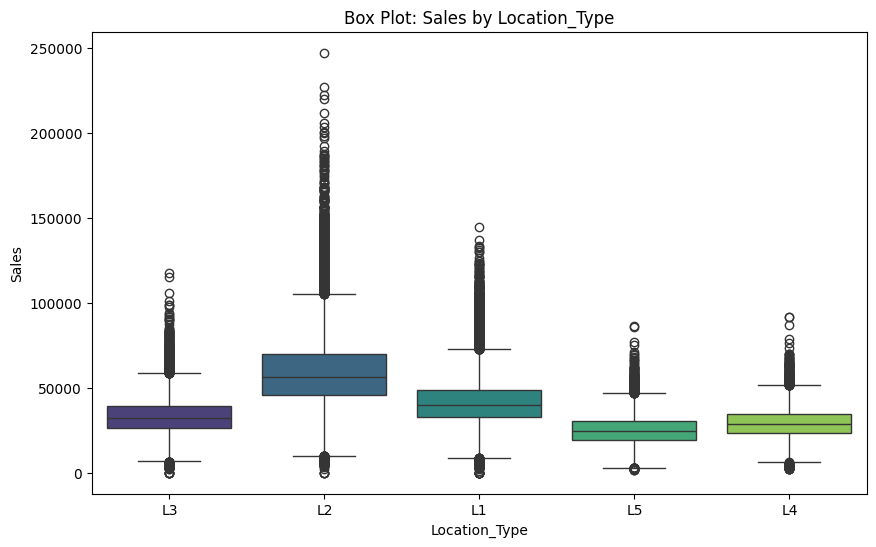

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Location_Type', y='Sales', data=df, palette='viridis')
plt.title('Box Plot: Sales by Location_Type')
plt.xlabel('Location_Type')
plt.ylabel('Sales')
plt.show()


In [18]:
L1_Locationtype=df[df['Location_Type']=='L1']['Sales']
L2_Locationtype=df[df['Location_Type']=='L2']['Sales']
L3_Locationtype=df[df['Location_Type']=='L3']['Sales']
L4_Locationtype=df[df['Location_Type']=='L4']['Sales']
L5_Locationtype=df[df['Location_Type']=='L5']['Sales']

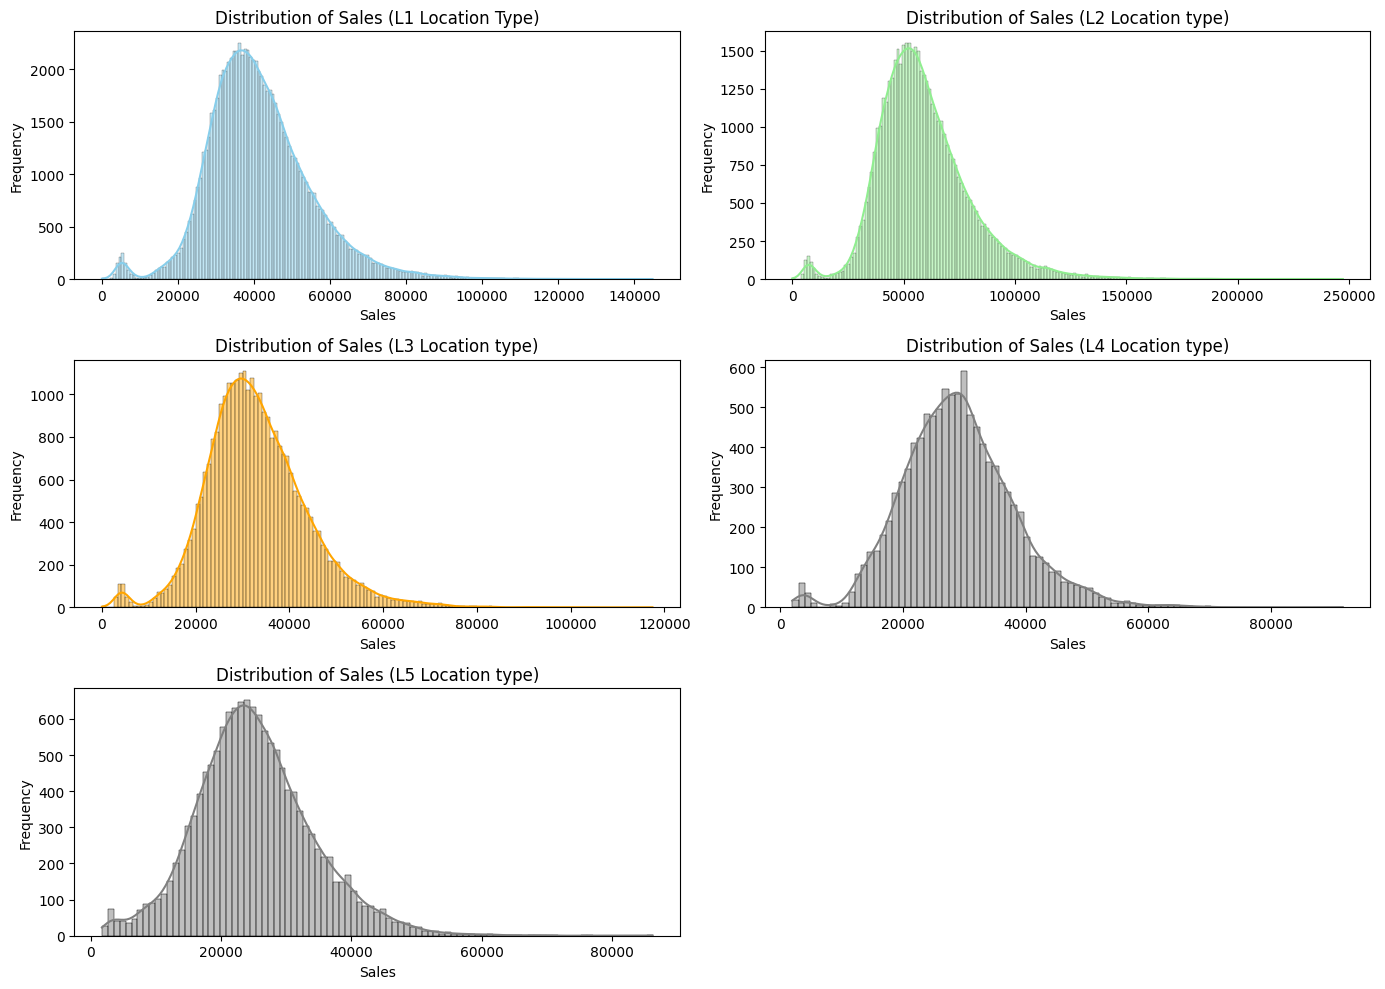

In [19]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram for Sales with L1 Location Type
plt.subplot(3, 2, 1)  # 3 rows, 2 columns, 1st plot
sns.histplot(L1_Locationtype, kde=True, color='skyblue')
plt.title('Distribution of Sales (L1 Location Type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with L2 Location Type
plt.subplot(3, 2, 2)  # 3 rows, 2 columns, 2nd plot
sns.histplot(L2_Locationtype, kde=True, color='lightgreen')
plt.title('Distribution of Sales (L2 Location type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with L3 Location type
plt.subplot(3, 2, 3)  # 3 rows, 2 columns, 3rd plot
sns.histplot(L3_Locationtype, kde=True, color='orange')
plt.title('Distribution of Sales (L3 Location type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with L4 Location type
plt.subplot(3, 2, 4)  # 3 rows, 2 columns, 4th plot
sns.histplot(L4_Locationtype, kde=True, color='grey')
plt.title('Distribution of Sales (L4 Location type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with L5 Location type
plt.subplot(3, 2, 5)  # 3 rows, 2 columns, 5th plot
sns.histplot(L5_Locationtype, kde=True, color='grey')
plt.title('Distribution of Sales (L5 Location type)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout to fit all plots nicely
plt.tight_layout()
plt.show()


In [20]:
 #Normality check for large dataset-Jarque-Bera Test or Anderson-Darling Test
from scipy.stats import jarque_bera, anderson
sales_data=[L1_Locationtype,L2_Locationtype,L3_Locationtype,L4_Locationtype,L5_Locationtype]
for sd in sales_data:
        jb_stat, jb_p_value = jarque_bera(sd)
        #print(f"Category: {sd}")
        print(f"Jarque-Bera Test: Statistic={jb_stat}, p-value={jb_p_value}")
        ad_result = anderson(sd)
        print(f"Anderson-Darling Test: Statistic={ad_result.statistic}, Significance={ad_result.significance_level}")
        if jb_p_value<0.05:
          print("Reject Null Hypothesis. Data is NOT NORMALLY distributed")
          print(" ")
        else:
          print("Failure to reject Null Hypothesis. Data is NORMALLY distributed")
          print(" ")

Jarque-Bera Test: Statistic=22306.83844005972, p-value=0.0
Anderson-Darling Test: Statistic=661.8587917862023, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=27884.20779992529, p-value=0.0
Anderson-Darling Test: Statistic=569.0362187333521, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=6544.376454183386, p-value=0.0
Anderson-Darling Test: Statistic=168.1540340921565, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=1546.2938321674037, p-value=0.0
Anderson-Darling Test: Statistic=32.564686358209656, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=1347.6300069357621, p-value=2.3219997587409775e-293
Anderson-Darling Test: Statistic=40.91801325302367, Significance=[15.  10.   5

H0(Null Hypothesis): Data is normally distributed
Ha(Alternative Hypothesis): Data is not normally distributed

Interpreting the Output:

Jarque-Bera Test In all cases, the p-value is 0.0, indicating strong evidence against normality. The large test statistics (e.g., 27884.2, 22306.8, etc.) confirm significant deviations from normality.
Anderson-Darling Test For all categories, the test statistic values (e.g., 661.85, 569.03, etc.) are much larger than the significance thresholds (e.g., 15, 10, 5, etc.). This confirms the data is not normally distributed at all conventional significance levels (1%, 2.5%, 5%, 10%, 15%).
For all categories: Both Jarque-Bera and Anderson-Darling tests strongly reject the hypothesis that the sales data is normally distributed. The data deviates significantly from normality in terms of skewness and/or kurtosis (confirmed by Jarque-Bera) and overall fit to a normal distribution (Anderson-Darling)

In [21]:
#using non parametric test to find pvalue
from scipy.stats import kruskal
stat, p_value = kruskal(L1_Locationtype,L2_Locationtype,L3_Locationtype,L4_Locationtype,L5_Locationtype)
print(f"Kruskal-Wallis Test: Statistic={stat}, p-value={p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one category's median sales is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median sales across categories.")

Kruskal-Wallis Test: Statistic=72945.84237905528, p-value=0.0
Reject the null hypothesis: At least one category's median sales is significantly different.


In [22]:
#dunns test to understand median of which pair is significantly different
from scikit_posthocs import posthoc_dunn

# Perform Dunn's post-hoc test
posthoc = posthoc_dunn(df, val_col='Sales', group_col='Location_Type', p_adjust='bonferroni')

print(posthoc)


     L1   L2             L3             L4            L5
L1  1.0  0.0   0.000000e+00   0.000000e+00  0.000000e+00
L2  0.0  1.0   0.000000e+00   0.000000e+00  0.000000e+00
L3  0.0  0.0   1.000000e+00  2.861858e-150  0.000000e+00
L4  0.0  0.0  2.861858e-150   1.000000e+00  9.268691e-81
L5  0.0  0.0   0.000000e+00   9.268691e-81  1.000000e+00


Interpretation:
L1 and L2 differ significantly from all other groups.
L3 vs. L4 and L4 vs. L5 show very small p-values (2.861858e-150 and 9.268691e-81), indicating extremely strong evidence of significant differences between these pairs.
All pairwise comparisons have p-values below 0.05, meaning all groups significantly differ from each other in terms of the tested metric.










## Region code Vs Sales

In [23]:
X = df_encoded[['Region_Code_R2', 'Region_Code_R3', 'Region_Code_R4']]# Independent variable
y = df['Sales']  # Dependent variable

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for Store_type
print(f"Coefficient for Region_code: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")

Coefficient for Region_code: [-6710.64106098 -4620.97134278 -7022.05415655]
R^2 score: 0.02609986072984205


Interpretation:

These coefficients represent the change in the dependent variable (e.g., Sales) relative to the base category (R1), while keeping other variables constant.

R2: Sales in R2 are predicted to be 6710.64 units lower than in R1.
R3: Sales in R3 are predicted to be 4620.97 units lower than in R1.
R4: Sales in R4 are predicted to be 7022.05 units lower than in R1.

All coefficients are negative, meaning regions R2, R3, and R4 perform worse in sales compared to R1.
The magnitude of these values shows the degree of difference, with R4 having the largest negative impact on sales relative to R1.

This low R(square)  suggests that Region_Code alone is not a strong predictor of sales.
Most of the variation in sales is likely due to other factors

<ipython-input-24-33b49738c130>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Region_Code', y='Sales', data=df, palette='viridis')


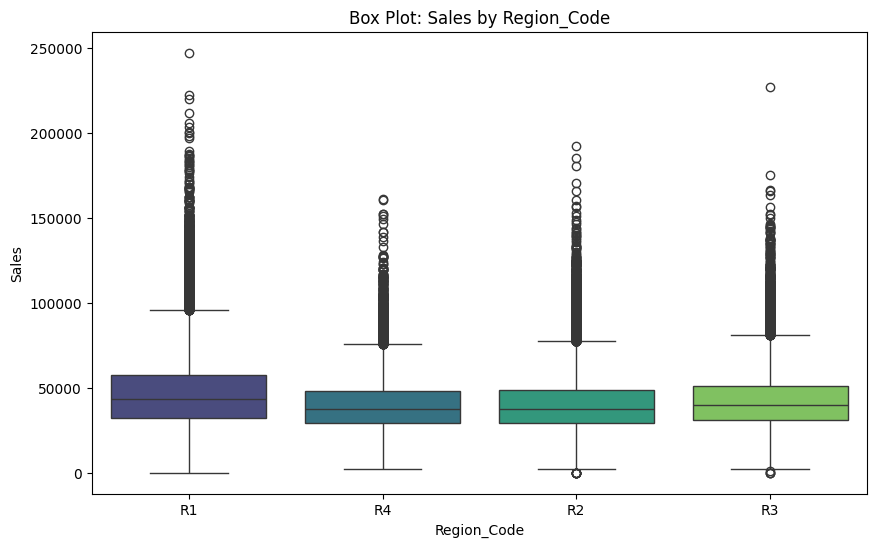

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region_Code', y='Sales', data=df, palette='viridis')
plt.title('Box Plot: Sales by Region_Code')
plt.xlabel('Region_Code')
plt.ylabel('Sales')
plt.show()


In [25]:
R1_Region_Code=df[df['Region_Code']=='R1']['Sales']
R2_Region_Code=df[df['Region_Code']=='R2']['Sales']
R3_Region_Code=df[df['Region_Code']=='R3']['Sales']
R4_Region_Code=df[df['Region_Code']=='R4']['Sales']


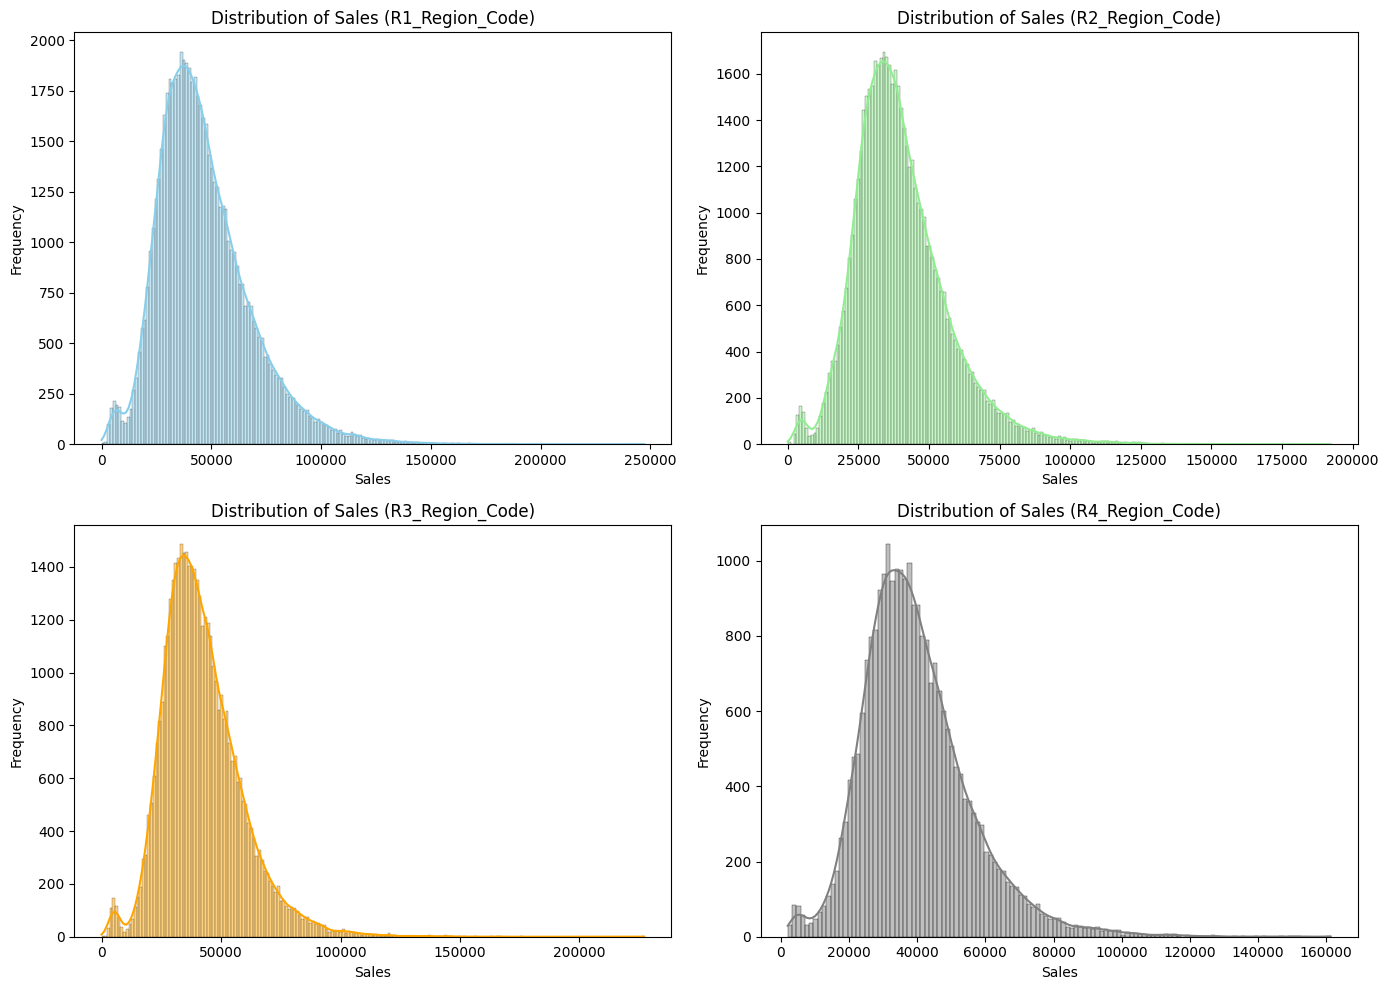

In [26]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram for Sales with R1_Region_Code
plt.subplot(2, 2, 1)  # 2 rows, 2 columns, 1st plot
sns.histplot(R1_Region_Code, kde=True, color='skyblue')
plt.title('Distribution of Sales (R1_Region_Code)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with R2_Region_Code
plt.subplot(2, 2, 2)  # 2 rows, 2 columns, 2nd plot
sns.histplot(R2_Region_Code, kde=True, color='lightgreen')
plt.title('Distribution of Sales (R2_Region_Code)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with R3_Region_Code
plt.subplot(2, 2, 3)  # 2 rows, 2 columns, 3rd plot
sns.histplot(R3_Region_Code, kde=True, color='orange')
plt.title('Distribution of Sales (R3_Region_Code)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with R4_Region_Code
plt.subplot(2, 2, 4)  # 2 rows, 2 columns, 4th plot
sns.histplot(R4_Region_Code, kde=True, color='grey')
plt.title('Distribution of Sales (R4_Region_Code)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout to fit all plots nicely
plt.tight_layout()
plt.show()


In [27]:
 #Normality check for large dataset-Jarque-Bera Test or Anderson-Darling Test
from scipy.stats import jarque_bera, anderson
sales_data=[R1_Region_Code, R2_Region_Code, R3_Region_Code, R4_Region_Code]
for sd in sales_data:
        jb_stat, jb_p_value = jarque_bera(sd)
        #print(f"Category: {sd}")
        print(f"Jarque-Bera Test: Statistic={jb_stat}, p-value={jb_p_value}")
        ad_result = anderson(sd)
        print(f"Anderson-Darling Test: Statistic={ad_result.statistic}, Significance={ad_result.significance_level}")
        if jb_p_value<0.05:
          print("Reject Null Hypothesis. Data is NOT NORMALLY distributed")
          print(" ")
        else:
          print("Failure to reject Null Hypothesis. Data is NORMALLY distributed")
          print(" ")

Jarque-Bera Test: Statistic=36676.08071560511, p-value=0.0
Anderson-Darling Test: Statistic=822.7132299446021, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=32973.39864630127, p-value=0.0
Anderson-Darling Test: Statistic=630.9282170134684, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=25211.037846959392, p-value=0.0
Anderson-Darling Test: Statistic=455.6773764237296, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=13988.493558449994, p-value=0.0
Anderson-Darling Test: Statistic=271.10933190990545, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 


H0(Null Hypothesis): Data is normally distributed
Ha(Alternative Hypothesis): Data is not normally distributed

Interpreting the Output:

Jarque-Bera Test In all cases, the p-value is 0.0, indicating strong evidence against normality. The large test statistics (e.g., 36676.08, 32973.3, etc.) confirm significant deviations from normality.
Anderson-Darling Test For all categories, the test statistic values (e.g., 822.7, 630.9, etc.) are much larger than the significance thresholds (e.g., 15, 10, 5, etc.). This confirms the data is not normally distributed at all conventional significance levels (1%, 2.5%, 5%, 10%, 15%).
For all categories: Both Jarque-Bera and Anderson-Darling tests strongly reject the hypothesis that the sales data is normally distributed. The data deviates significantly from normality in terms of skewness and/or kurtosis (confirmed by Jarque-Bera) and overall fit to a normal distribution (Anderson-Darling)

In [28]:
#using non parametric test to find pvalue
from scipy.stats import kruskal
stat, p_value = kruskal(R1_Region_Code,R2_Region_Code,R3_Region_Code,R4_Region_Code)
print(f"Kruskal-Wallis Test: Statistic={stat}, p-value={p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: At least one category's median sales is significantly different.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median sales across categories.")

Kruskal-Wallis Test: Statistic=3968.063590460667, p-value=0.0
Reject the null hypothesis: At least one category's median sales is significantly different.


## Date Vs Sales

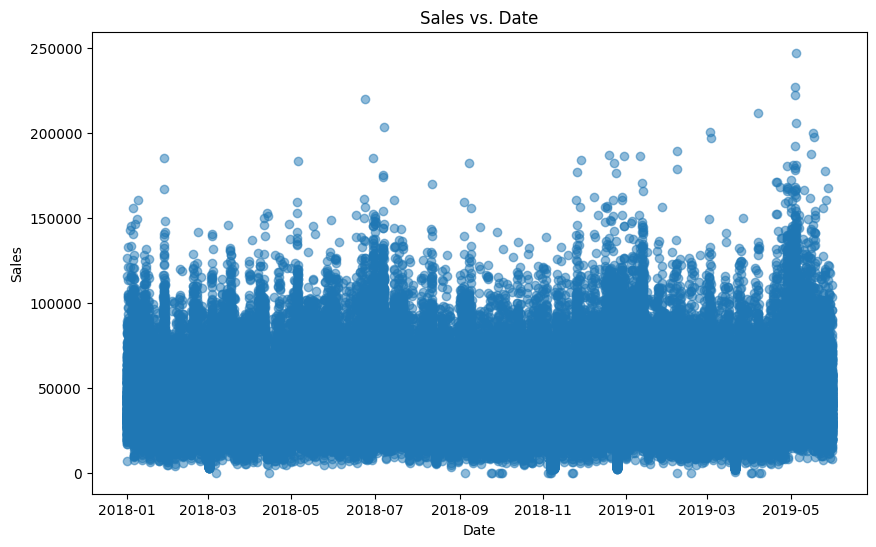

In [29]:
import matplotlib.pyplot as plt

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Date'], df['Sales'], alpha=0.5)
plt.title('Sales vs. Date')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()


In [30]:
# Convert 'Date' to numeric (days since the start of the dataset)
df['Days_Since_Start'] = (df['Date'] - df['Date'].min()).dt.days

# Calculate correlation
correlation = df['Days_Since_Start'].corr(df['Sales'])
print(f"Correlation between Date and Sales: {correlation}")


Correlation between Date and Sales: 0.005265972496216065


In [31]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data for regression
X = df['Days_Since_Start'].values.reshape(-1, 1)  # Independent variable
y = df['Sales']  # Dependent variable

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Get the slope and intercept
slope, intercept = model.coef_[0], model.intercept_
print(f"Slope: {slope}, Intercept: {intercept}")

# Calculate R^2
r_squared = model.score(X, y)
print(f"R^2 value: {r_squared}")


Slope: 0.6524893372493593, Intercept: 42616.31197718105
R^2 value: 2.77304663308664e-05


##Holiday Vs Sales

In [32]:
X = df_encoded[['Holiday']]# Independent variable
y = df['Sales']  # Dependent variable

# Initialize model
model = LinearRegression()

# Fit model
model.fit(X, y)

# Get the coefficient (slope) for Store_type
print(f"Coefficient for Holiday: {model.coef_}")

# Evaluate the model
y_pred = model.predict(X)
print(f"R^2 score: {model.score(X, y)}")

Coefficient for Holiday: [-8445.41006839]
R^2 score: 0.023956469493803034


In [33]:
# Get the intercept (β0)
print(f"Intercept (β0): {model.intercept_}")


Intercept (β0): 43897.28899828766


Interpretation:
The regression model predicts that sales on holiday days are, on average, 8445.41 units lower than on non-holiday days, assuming other factors remain constant.
A negative value indicates that holidays are associated with reduced sales compared to regular days in this dataset.

The R2 score indicates that the variable Holiday explains only 2.4% of the variance in Sales.
This suggests that while Holiday has some effect on sales, other factors contribute more significantly to variations in sales.

The model with just Holiday as a predictor is weak, as most of the variation in sales is not explained by this single variable.
Adding more variables would likely improve the model and provide better insights.

<ipython-input-34-758e05a8211f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Holiday', y='Sales', data=df, palette='viridis')


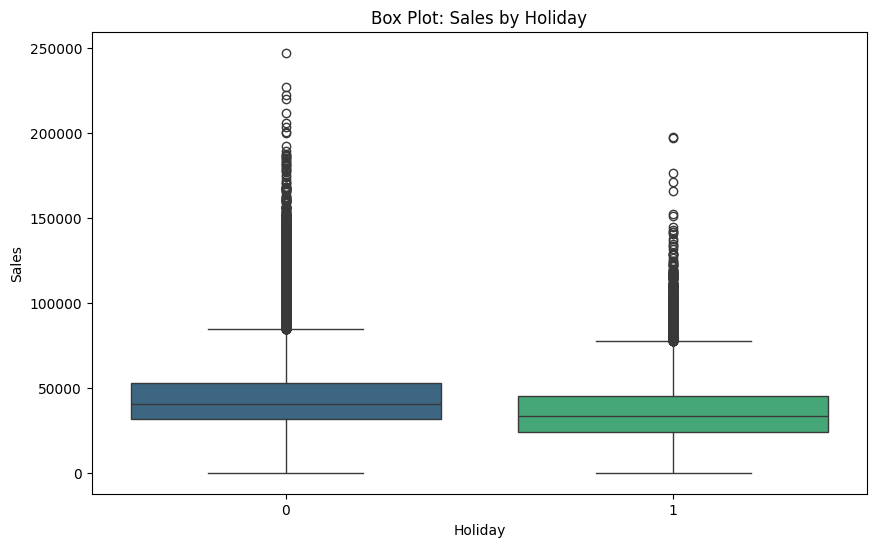

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Holiday', y='Sales', data=df, palette='viridis')
plt.title('Box Plot: Sales by Holiday')
plt.xlabel('Holiday')
plt.ylabel('Sales')
plt.show()


In [35]:
H1_Holiday=df[df['Holiday']==1]['Sales']
H0_Holiday=df[df['Holiday']==0]['Sales']


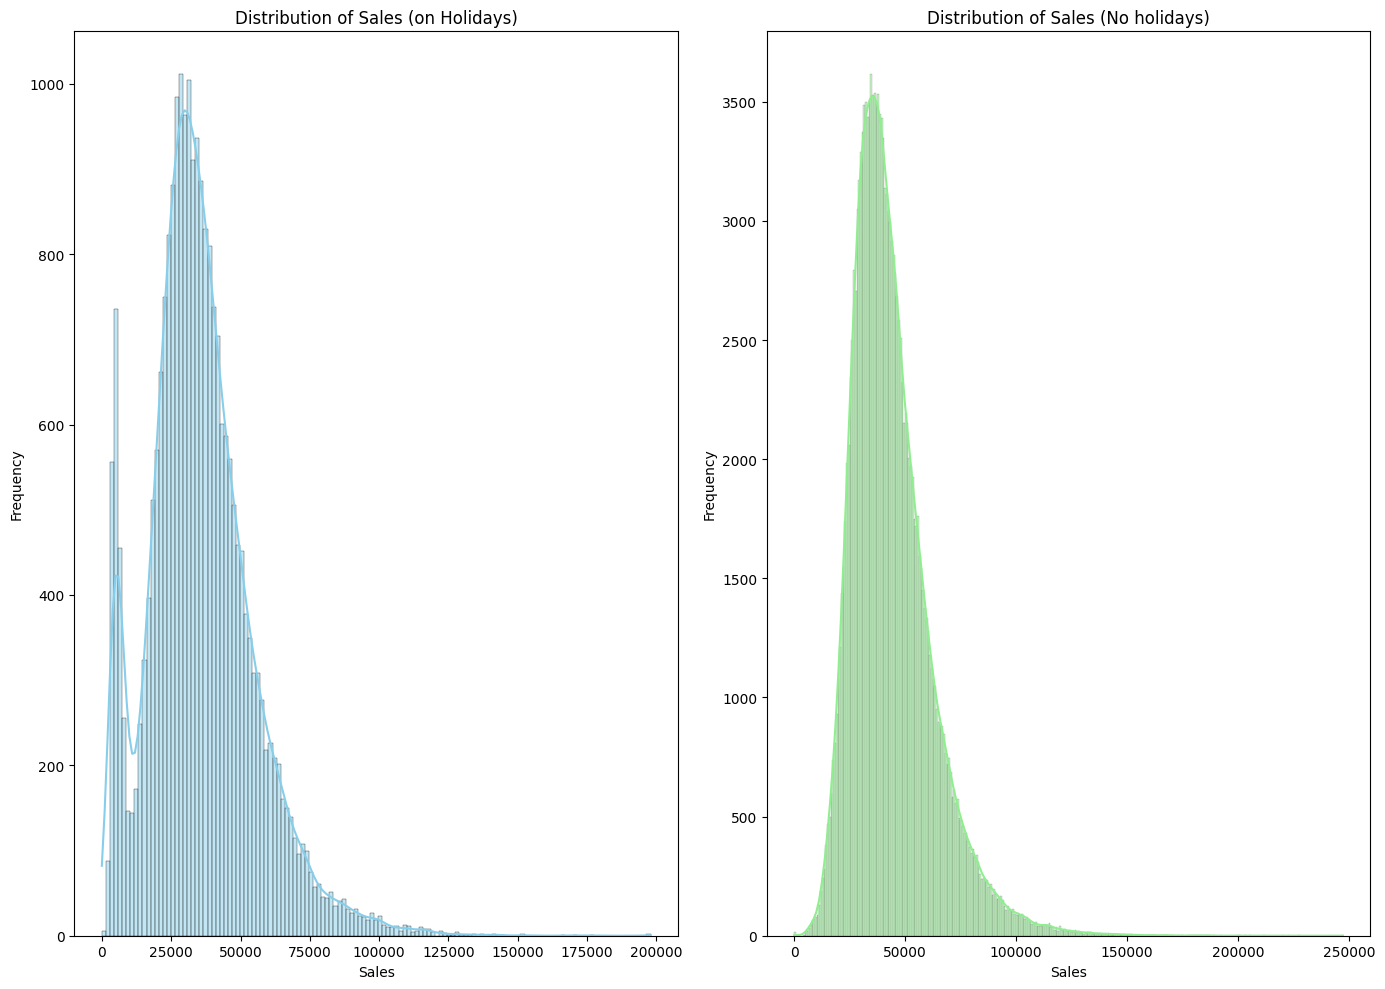

In [36]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram for Sales with Holidays
plt.subplot(1, 2, 1)  # 1 rows, 2 columns, 1st plot
sns.histplot(H1_Holiday, kde=True, color='skyblue')
plt.title('Distribution of Sales (on Holidays)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with No Holiday
plt.subplot(1, 2, 2)  # 1 rows, 2 columns, 2nd plot
sns.histplot(H0_Holiday, kde=True, color='lightgreen')
plt.title('Distribution of Sales (No holidays)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout to fit all plots nicely
plt.tight_layout()
plt.show()


In [37]:
 #Normality check for large dataset-Jarque-Bera Test or Anderson-Darling Test
from scipy.stats import jarque_bera, anderson
sales_data=[H1_Holiday,H0_Holiday]
for sd in sales_data:
        jb_stat, jb_p_value = jarque_bera(sd)
        #print(f"Category: {sd}")
        print(f"Jarque-Bera Test: Statistic={jb_stat}, p-value={jb_p_value}")
        ad_result = anderson(sd)
        print(f"Anderson-Darling Test: Statistic={ad_result.statistic}, Significance={ad_result.significance_level}")
        if jb_p_value<0.05:
          print("Reject Null Hypothesis. Data is NOT NORMALLY distributed")
          print(" ")
        else:
          print("Failure to reject Null Hypothesis. Data is NORMALLY distributed")
          print(" ")

Jarque-Bera Test: Statistic=10295.268296905388, p-value=0.0
Anderson-Darling Test: Statistic=186.73937885599298, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=148328.10145695324, p-value=0.0
Anderson-Darling Test: Statistic=2620.38482870211, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 


H0(Null Hypothesis): Data is normally distributed
Ha(Alternative Hypothesis): Data is not normally distributed

Interpreting the Output:

Jarque-Bera Test In all cases, the p-value is 0.0, indicating strong evidence against normality. The large test statistics (e.g., 10295.2, 148328.1, etc.) confirm significant deviations from normality.
Anderson-Darling Test For all categories, the test statistic values (e.g., 186.7, 2620.38, etc.) are much larger than the significance thresholds (e.g., 15, 10, 5, etc.). This confirms the data is not normally distributed at all conventional significance levels (1%, 2.5%, 5%, 10%, 15%).
For all categories: Both Jarque-Bera and Anderson-Darling tests strongly reject the hypothesis that the sales data is normally distributed. The data deviates significantly from normality in terms of skewness and/or kurtosis (confirmed by Jarque-Bera) and overall fit to a normal distribution (Anderson-Darling)

In [38]:
#using non parametric test to find pvalue
from scipy.stats import kruskal,mannwhitneyu
stat, p_value = mannwhitneyu(H1_Holiday,H0_Holiday)
print(f"mannwhitneyu Test: Statistic={stat}, p-value={p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean of sales on holiday is not equal to mean of sales on non-holidays")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean of sales on holidays and non-holiday.")

mannwhitneyu Test: Statistic=1478686923.5, p-value=0.0
Reject the null hypothesis: Mean of sales on holiday is not equal to mean of sales on non-holidays


##Discount Vs Sales

In [39]:
from sklearn.linear_model import LinearRegression

# Map 'Discount' column to numeric values
#df_encoded['Discount'] = df_encoded['Discount'].map({'Yes':1, 'No':0})

# Define independent and dependent variables
X = df_encoded['Discount'].values.reshape(-1, 1)  # Reshaped to 2D array
y = df['Sales']  # Dependent variable

# Initialize the model
model = LinearRegression()

# Fit the model
model.fit(X, y)

# Get the coefficient (slope) for Discount
print(f"Coefficient for Discount: {model.coef_[0]}")

# Evaluate the model
print(f"R^2 score: {model.score(X, y)}")


Coefficient for Discount: 12022.81794157572
R^2 score: 0.10491519160374752


In [40]:
# Get the intercept (β0)
print(f"Intercept (β0): {model.intercept_}")


Intercept (β0): 37403.679678042485


<ipython-input-41-2854f0eac028>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Discount', y='Sales', data=df, palette='viridis')


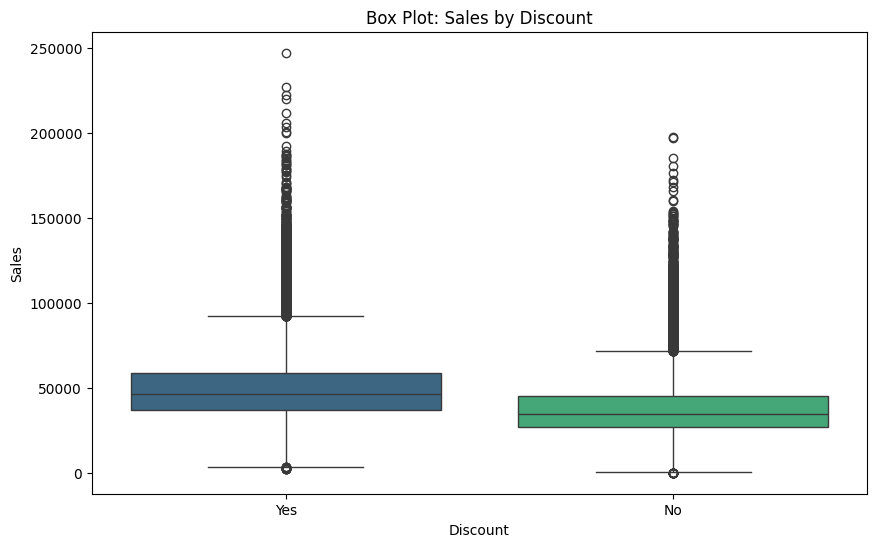

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.boxplot(x='Discount', y='Sales', data=df, palette='viridis')
plt.title('Box Plot: Sales by Discount')
plt.xlabel('Discount')
plt.ylabel('Sales')
plt.show()


In [42]:
D1_Discount=df_encoded[df_encoded['Discount']==1]['Sales']
D0_Discount=df_encoded[df_encoded['Discount']==0]['Sales']


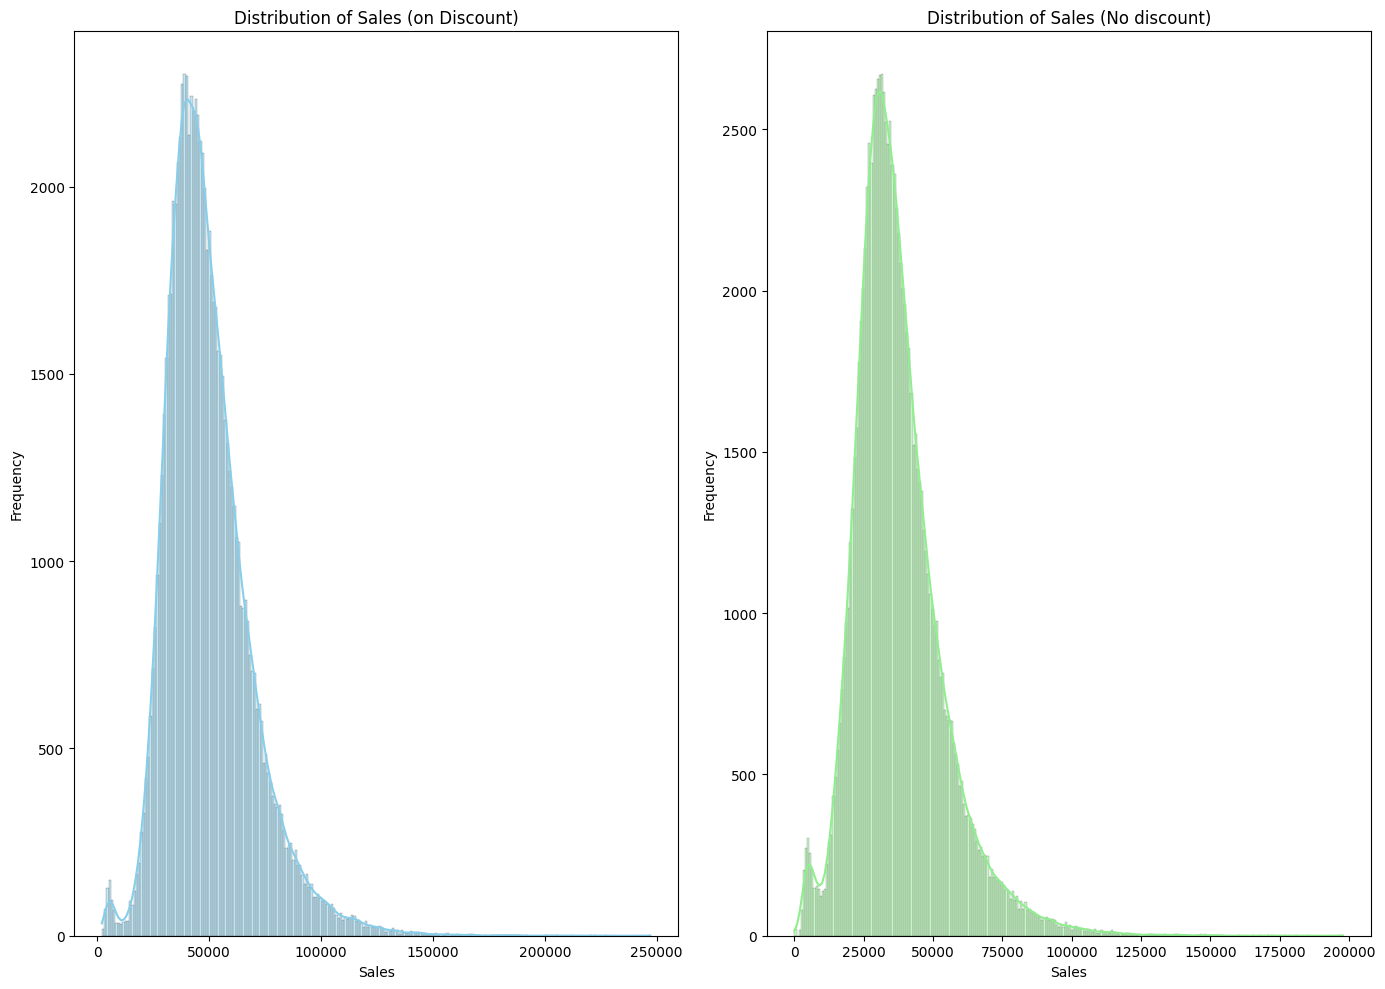

In [43]:
# Set the figure size
plt.figure(figsize=(14, 10))

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.3)

# Plot histogram for Sales with Holidays
plt.subplot(1, 2, 1)  # 1 rows, 2 columns, 1st plot
sns.histplot(D1_Discount, kde=True, color='skyblue')
plt.title('Distribution of Sales (on Discount)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Plot histogram for Sales with No Holiday
plt.subplot(1, 2, 2)  # 1 rows, 2 columns, 2nd plot
sns.histplot(D0_Discount, kde=True, color='lightgreen')
plt.title('Distribution of Sales (No discount)')
plt.xlabel('Sales')
plt.ylabel('Frequency')

# Adjust layout to fit all plots nicely
plt.tight_layout()
plt.show()


In [44]:
 #Normality check for large dataset-Jarque-Bera Test or Anderson-Darling Test
from scipy.stats import jarque_bera, anderson
sales_data=[D1_Discount,D0_Discount]
for sd in sales_data:
        jb_stat, jb_p_value = jarque_bera(sd)
        #print(f"Category: {sd}")
        print(f"Jarque-Bera Test: Statistic={jb_stat}, p-value={jb_p_value}")
        ad_result = anderson(sd)
        print(f"Anderson-Darling Test: Statistic={ad_result.statistic}, Significance={ad_result.significance_level}")
        if jb_p_value<0.05:
          print("Reject Null Hypothesis. Data is NOT NORMALLY distributed")
          print(" ")
        else:
          print("Failure to reject Null Hypothesis. Data is NORMALLY distributed")
          print(" ")

Jarque-Bera Test: Statistic=68100.04345659392, p-value=0.0
Anderson-Darling Test: Statistic=1155.2313106372749, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 
Jarque-Bera Test: Statistic=94917.7336793026, p-value=0.0
Anderson-Darling Test: Statistic=1524.6962043630774, Significance=[15.  10.   5.   2.5  1. ]
Reject Null Hypothesis. Data is NOT NORMALLY distributed
 


In [45]:
#using non parametric test to find pvalue
from scipy.stats import kruskal,mannwhitneyu
stat, p_value = mannwhitneyu(D1_Discount,D0_Discount)
print(f"mannwhitneyu Test: Statistic={stat}, p-value={p_value}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: Mean of sales on Discount days is not equal to mean of sales on non-discount days")
else:
    print("Fail to reject the null hypothesis: No significant difference in mean of sales on holidays and non-holiday.")

mannwhitneyu Test: Statistic=6190447035.5, p-value=0.0
Reject the null hypothesis: Mean of sales on Discount days is not equal to mean of sales on non-discount days


## Number of orders Vs sales

In [46]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Prepare data
X = df[['#Order']]#.values.reshape(-1, 1)  # Independent variable (reshaped to 2D array)
y = df['Sales']                         # Dependent variable

# Fit the model
model = LinearRegression()
model.fit(X, y)

# Print the slope and intercept
print(f"Slope: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")

# R^2 score
print(f"R^2 score: {model.score(X, y)}")


Slope: 570.4076695653783
Intercept: 3879.2782514435967
R^2 score: 0.8866116232787222


In [47]:
# Verify all columns are numeric
df_encoded.dtypes

# If any columns are still non-numeric, handle them appropriately


,0
Holiday,int64
Discount,int64
#Order,int64
Sales,float64
Store_Type_S2,bool
Store_Type_S3,bool
Store_Type_S4,bool
Location_Type_L2,bool
Location_Type_L3,bool
Location_Type_L4,bool


##Linear Regression model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split the dataset
X = df_encoded.drop(columns=['Sales'])  # Features
y = df_encoded['Sales']                 # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Predict
y_pred = linear_model.predict(X_test)

# Evaluate
print("Linear Regression Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred))}")


Linear Regression Performance:
R^2 Score: 0.9236546693626547
MAE: 3667.9620246017
RMSE: 5080.395274343216


##Random Forest Reggressor model

In [49]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Initialize Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate performance
print("Random Forest Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")


Random Forest Performance:
R^2 Score: 0.9642223280312437
MAE: 2419.974547065292
RMSE: 3477.861653882829


In [50]:
# Match feature importances with feature names
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Display the sorted feature importance
print(feature_importance)


             Feature  Importance
2             #Order    0.898479
16  Days_Since_Start    0.032632
1           Discount    0.010920
14             Month    0.010650
6   Location_Type_L2    0.009279
5      Store_Type_S4    0.007901
15       Day_of_Week    0.006850
11    Region_Code_R3    0.004369
0            Holiday    0.003034
10    Region_Code_R2    0.002807
7   Location_Type_L3    0.002505
9   Location_Type_L5    0.002285
4      Store_Type_S3    0.002197
3      Store_Type_S2    0.002021
12    Region_Code_R4    0.001970
8   Location_Type_L4    0.001656
13              Year    0.000445


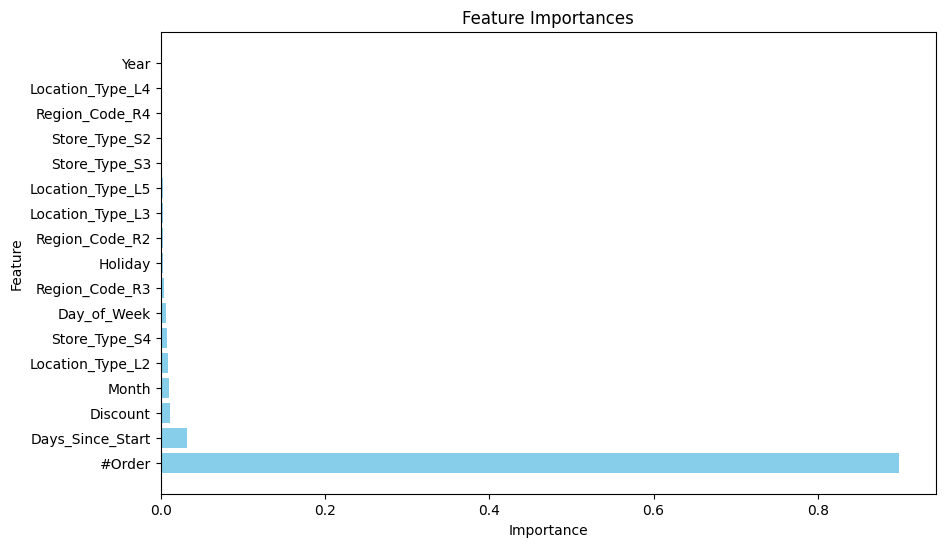

In [51]:
import matplotlib.pyplot as plt

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['Feature'], feature_importance['Importance'], color='skyblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [51]:
'''from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define the parameter distribution
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Initialize Random Forest model
rf = RandomForestRegressor(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=20, scoring='neg_mean_squared_error',
                                   cv=3, verbose=2, n_jobs=-1, random_state=42)

random_search.fit(X_train, y_train)

# Best parameters and model performance
print("Best Parameters:", random_search.best_params_)
best_rf = random_search.best_estimator_

# Evaluate on test set
y_pred_rf = best_rf.predict(X_test)
print("Random Forest - Tuned Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_rf)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_rf))}")'''


'from sklearn.model_selection import RandomizedSearchCV\nfrom sklearn.ensemble import RandomForestRegressor\n\n# Define the parameter distribution\nparam_dist = {\n    \'n_estimators\': [50, 100, 200],\n    \'max_depth\': [None, 10, 20],\n    \'min_samples_split\': [2, 5, 10],\n    \'min_samples_leaf\': [1, 2, 4],\n    \'max_features\': [\'auto\', \'sqrt\', \'log2\']\n}\n\n# Initialize Random Forest model\nrf = RandomForestRegressor(random_state=42)\n\n# Perform Randomized Search\nrandom_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,\n                                   n_iter=20, scoring=\'neg_mean_squared_error\',\n                                   cv=3, verbose=2, n_jobs=-1, random_state=42)\n\nrandom_search.fit(X_train, y_train)\n\n# Best parameters and model performance\nprint("Best Parameters:", random_search.best_params_)\nbest_rf = random_search.best_estimator_\n\n# Evaluate on test set\ny_pred_rf = best_rf.predict(X_test)\nprint("Random Forest - Tune

##Hyperparameter tuning for Random forest regresser

In [52]:
import optuna
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define the objective function
def objective(trial):
    # Suggest hyperparameters to tune
    n_estimators = trial.suggest_int('n_estimators', 50, 200)  # Number of trees
    max_depth = trial.suggest_int('max_depth', 10, 30)        # Tree depth
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10)  # Min samples to split
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4)  # Min samples per leaf

    # Initialize the model with suggested hyperparameters
    rf = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    # Train the model
    rf.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = rf.predict(X_test)

    # Evaluate using Mean Squared Error
    return mean_squared_error(y_test, y_pred)

# Create a study object and optimize
study = optuna.create_study(direction='minimize')  # Minimize the MSE
study.optimize(objective, n_trials=20)  # Run 20 trials

# Best hyperparameters
print("Best Parameters:", study.best_params)

# Train final model with best hyperparameters
best_params = study.best_params
final_rf = RandomForestRegressor(
    n_estimators=best_params['n_estimators'],
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    random_state=42
)
final_rf.fit(X_train, y_train)

# Evaluate final model
y_pred_final = final_rf.predict(X_test)
print(f"Final Model Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_final)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_final)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_final))}")


[I 2024-12-05 18:38:26,617] A new study created in memory with name: no-name-32067537-f1fd-4458-9798-07055a1509b4
[I 2024-12-05 18:40:06,461] Trial 0 finished with value: 11520925.895857211 and parameters: {'n_estimators': 199, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 1}. Best is trial 0 with value: 11520925.895857211.
[I 2024-12-05 18:41:19,793] Trial 1 finished with value: 12218400.369894996 and parameters: {'n_estimators': 177, 'max_depth': 17, 'min_samples_split': 4, 'min_samples_leaf': 3}. Best is trial 0 with value: 11520925.895857211.
[I 2024-12-05 18:42:20,914] Trial 2 finished with value: 12433244.45466784 and parameters: {'n_estimators': 156, 'max_depth': 16, 'min_samples_split': 7, 'min_samples_leaf': 2}. Best is trial 0 with value: 11520925.895857211.
[I 2024-12-05 18:42:49,273] Trial 3 finished with value: 12074717.266300833 and parameters: {'n_estimators': 63, 'max_depth': 23, 'min_samples_split': 6, 'min_samples_leaf': 4}. Best is trial 0 with value: 

Best Parameters: {'n_estimators': 199, 'max_depth': 22, 'min_samples_split': 7, 'min_samples_leaf': 1}
Final Model Performance:
R^2 Score: 0.9659219405113415
MAE: 2356.806367919256
RMSE: 3394.248944296398


##XGBoost Regressor Model

In [49]:
from xgboost import XGBRegressor

# Initialize XGBoost model
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate performance
print("XGBoost Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_xgb)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_xgb)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_xgb))}")


XGBoost Performance:
R^2 Score: 0.9684773245891073
MAE: 2234.421489083593
RMSE: 3264.5084589422054


## Hyperparameter tuning for XGBRegresser

In [50]:
import optuna
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np

# Split your data (if not already split)
# Assuming X and y are your feature matrix and target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the objective function for Optuna
def objective(trial):
    # Suggest values for hyperparameters
    param = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 300),  # Number of boosting rounds
        'max_depth': trial.suggest_int('max_depth', 3, 10),         # Maximum depth of a tree
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),  # Step size shrinkage
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),  # Minimum sum of child weights
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),    # Subsample ratio of the training data
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),  # Subsample ratio of columns
        'gamma': trial.suggest_float('gamma', 0, 5),                # Minimum loss reduction
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 10),       # L1 regularization term
        'reg_lambda': trial.suggest_float('reg_lambda', 0, 10)      # L2 regularization term
    }

    # Train XGBoost model with suggested hyperparameters
    model = XGBRegressor(**param, random_state=42)
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_test)

    # Calculate Mean Squared Error
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Create an Optuna study and optimize
study = optuna.create_study(direction='minimize')  # Minimize MSE
study.optimize(objective, n_trials=20)  # Perform 20 trials

# Print the best parameters and best score
print("Best Parameters:", study.best_params)
print("Best MSE:", study.best_value)

# Train the final model with the best parameters
best_params = study.best_params
final_model = XGBRegressor(**best_params, random_state=42)
final_model.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred_final = final_model.predict(X_test)
print(f"Final Model Performance:")
print(f"R^2 Score: {r2_score(y_test, y_pred_final)}")
print(f"MAE: {mean_absolute_error(y_test, y_pred_final)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_final))}")


[I 2024-12-07 10:52:32,202] A new study created in memory with name: no-name-07eb29bf-46c5-4f76-8a24-36679f46d637
[I 2024-12-07 10:52:33,953] Trial 0 finished with value: 15897226.206019094 and parameters: {'n_estimators': 160, 'max_depth': 4, 'learning_rate': 0.03781814219848172, 'min_child_weight': 10, 'subsample': 0.706719739759467, 'colsample_bytree': 0.8565332388892819, 'gamma': 2.4358083069719685, 'reg_alpha': 4.420464544958861, 'reg_lambda': 4.8131414476587935}. Best is trial 0 with value: 15897226.206019094.
[I 2024-12-07 10:52:36,211] Trial 1 finished with value: 11174594.48051053 and parameters: {'n_estimators': 87, 'max_depth': 10, 'learning_rate': 0.091928163954368, 'min_child_weight': 4, 'subsample': 0.7545663402688285, 'colsample_bytree': 0.5177547710878008, 'gamma': 1.3937082106566434, 'reg_alpha': 4.007182322700001, 'reg_lambda': 0.1407370400088659}. Best is trial 1 with value: 11174594.48051053.
[I 2024-12-07 10:52:39,592] Trial 2 finished with value: 10107869.51598774

Best Parameters: {'n_estimators': 298, 'max_depth': 6, 'learning_rate': 0.29282477964703135, 'min_child_weight': 2, 'subsample': 0.9117550087529298, 'colsample_bytree': 0.5845467381252563, 'gamma': 0.971253746559752, 'reg_alpha': 6.422426333353242, 'reg_lambda': 9.024733077149628}
Best MSE: 9803358.974521529
Final Model Performance:
R^2 Score: 0.9710023783381377
MAE: 2137.191702737686
RMSE: 3131.0316150626027


##Cross Validation to confirm the model's robustness across different subsets of the data.

In [51]:
from sklearn.model_selection import cross_val_score

# Initialize XGBoost with best parameters
final_xgb = XGBRegressor(**study.best_params, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(final_xgb, X, y, scoring='neg_mean_squared_error', cv=5)
cv_rmse = np.sqrt(-cv_scores)

print(f"Cross-Validation RMSE: {cv_rmse.mean():.2f} ± {cv_rmse.std():.2f}")


Cross-Validation RMSE: 4945.30 ± 1125.29


##check for overfitting

In [52]:
final_xgb.fit(X_train, y_train)
train_pred = final_xgb.predict(X_train)
train_r2 = r2_score(y_train, train_pred)
print(f"Train R^2 Score: {train_r2}")


Train R^2 Score: 0.975429841807147


##Feature Importance Analysis

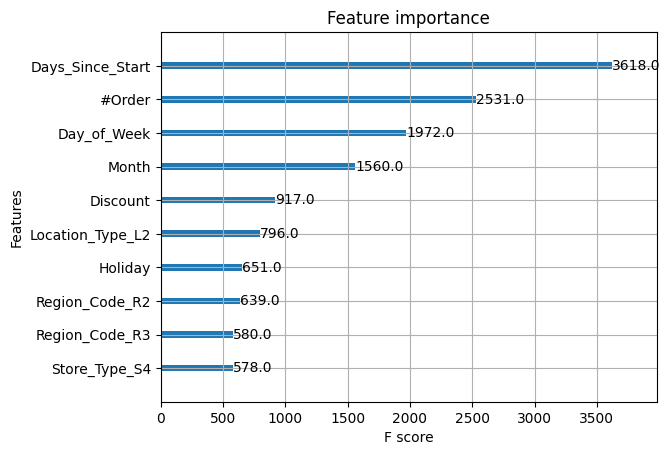

In [53]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Train the final model
final_xgb.fit(X_train, y_train)

# Plot feature importance
xgb.plot_importance(final_xgb, max_num_features=10)
plt.show()


##Fine-tune due to overfiting in XGBReggresser using optum

In [ ]:
import optuna
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import numpy as np

# Define the objective function for Optuna
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'gamma': trial.suggest_loguniform('gamma', 0.01, 5.0),
        'subsample': trial.suggest_float('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 0.1, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 0.1, 10.0)
    }

    # Initialize the model with trial parameters
    model = XGBRegressor(**params, random_state=42)

    # Perform cross-validation
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
    rmse = np.sqrt(-scores.mean())

    return rmse

# Run the Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

# Best parameters and performance
print("Best Parameters:", study.best_params)
print("Best RMSE:", study.best_value)

# Train the final model with best parameters
final_xgb = XGBRegressor(**study.best_params, random_state=42)
final_xgb.fit(X_train, y_train)

# Evaluate performance
train_pred = final_xgb.predict(X_train)
val_pred = final_xgb.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, train_pred))
val_rmse = np.sqrt(mean_squared_error(y_test, val_pred))
train_r2 = final_xgb.score(X_train, y_train)
val_r2 = final_xgb.score(X_test, y_test)

print(f"Train RMSE: {train_rmse}")
print(f"Validation RMSE: {val_rmse}")
print(f"Train R^2: {train_r2}")
print(f"Validation R^2: {val_r2}")


[I 2024-12-07 10:56:40,137] A new study created in memory with name: no-name-c76a41f9-cf28-458e-a760-cb45e022f025
<ipython-input-54-aeba418809db>:12: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.3),
<ipython-input-54-aeba418809db>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 0.01, 5.0),
<ipython-input-54-aeba418809db>:17: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'reg_alpha': trial.suggest_logu

##Model validation on test data

In [55]:
test_pred = final_xgb.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, test_pred))
test_r2 = final_xgb.score(X_test, y_test)
print(f"Test RMSE: {test_rmse}")
print(f"Test R^2: {test_r2}")


Test RMSE: 3117.2358924281903
Test R^2: 0.9712573497815121


In [56]:
import joblib
joblib.dump(final_xgb, 'final_xgb_model.pkl')


['final_xgb_model.pkl']